In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

<h2>Diezmado</h2>
<p>La función deberá elegir el nivel de diezmado más apropiado de acuerdo al factor de escalado R recibido. Los valores válidos para R son:</p>
<p>• R=0.50: Conservará 1 de cada 2 filas/columnas.</p>
<p>• R=0.33: Conservará 1 de cada 3 filas/columnas.</p>
<p>• R=0.25: Conservará 1 de cada 4 filas/columnas.</p>

In [1]:
def diezmado(img,r):
    dim=math.ceil(img.shape[0]*r)
    resimg=np.zeros((dim,dim),dtype=int)
    fila,col=0,0
    for i in range(resimg.shape[0]):
        for j in range(resimg.shape[1]):
            if i==j==0:
                resimg[i][j]=img[i][j]
            else:
                resimg[i][j]=img[math.ceil(i/r)][math.ceil(j/r)]
    return resimg

In [3]:
img=np.array([
    [0,1,3,2,4,3,1,4,10,7,13,10],
    [2,4,2,1,2,2,7,13,7,4,7,7],
    [7,8,5,6,4,3,22,25,16,19,13,10],
    [4,9,8,5,5,5,13,28,25,16,16,16],
    [4,8,7,5,4,5,13,25,22,16,13,16],
    [4,6,7,5,4,6,13,19,22,16,13,19],
    [0,1,3,2,4,3,1,4,10,7,13,10],
    [2,4,2,1,2,2,7,13,7,4,7,7],
    [7,8,5,6,4,3,22,25,16,19,13,10],
    [4,9,8,5,5,5,13,28,25,16,16,16],
    [4,8,7,5,4,5,13,25,22,16,13,16],
    [4,6,7,5,4,6,13,19,22,16,13,19]
])
res1=diezmado(img,0.5)
res2=diezmado(img,0.33)
res3=diezmado(img,0.25)
print(res1, res1.shape)
print(res2, res2.shape)
print(res3, res3.shape)

[[ 0  3  4  1 10 13]
 [ 7  5  4 22 16 13]
 [ 4  7  4 13 22 13]
 [ 0  3  4  1 10 13]
 [ 7  5  4 22 16 13]
 [ 4  7  4 13 22 13]] (6, 6)
[[ 0  4  4 13]
 [ 4  4 25 13]
 [ 2  2 13  7]
 [ 4  4 25 13]] (4, 4)
[[ 0  4 10]
 [ 4  4 22]
 [ 7  4 16]] (3, 3)


True

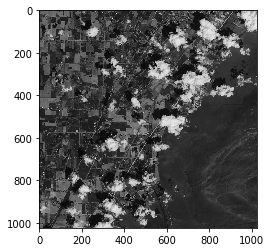

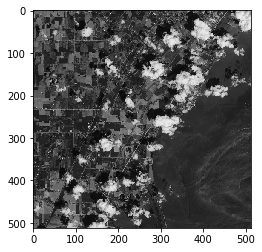

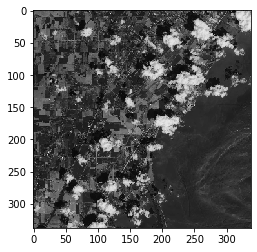

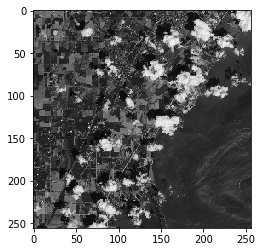

In [4]:
#Pruebas con la imagen
img=cv2.imread('../imgpack/Monobanda/7_Lake Erie.jpg',cv2.IMREAD_GRAYSCALE)
img_50=diezmado(img,0.5)
img_33=diezmado(img,0.33)
img_25=diezmado(img,0.25)
plt.figure(1)
plt.imshow(img,cmap='gray')
plt.figure(2)
plt.imshow(img_50,cmap='gray')
plt.figure(3)
plt.imshow(img_33,cmap='gray')
plt.figure(4)
plt.imshow(img_25,cmap='gray')
cv2.imwrite("modificadas/7_Lake Erie_Diezmado_50.png",img_50)
cv2.imwrite("modificadas/7_Lake Erie_Diezmado_33.png",img_33)
cv2.imwrite("modificadas/7_Lake Erie_Diezmado_25.png",img_25)

<h2>Ampliación de imagen</h2>
La función realiza la ampliación de una imagen mediante la técnica de interpolación bilineal. Se supone un factor de escalado R = 2 constante. Esto quiere decir que la imagen resultante deberá tener el doble de filas y el doble de columnas que la imagen original.

In [5]:
def amplia(img):
    R=2
    dim=math.ceil(img.shape[0]*R)
    resimg=np.zeros((dim,dim),dtype=int)
    #primer paso: incorporar en resimg los valores originales espaciados
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            resimg[i*R][j*R]=img[i][j]
    print("Paso I")
    print(resimg)
    #segundo paso: aplicar interpolación lineal por columnas (sin contar la última):
    for i in range(1,resimg.shape[0]-1,2):
        for j in range(0,resimg.shape[1],2):
             resimg[i,j]=np.round((resimg[i-1,j]+resimg[i+1,j])/2)
    print("Paso II")
    print(resimg)
    #tercer paso: aplicar interpolación lineal por filas (sin contar la última):
    for i in range(resimg.shape[0]):
        for j in range(1,resimg.shape[1]-1,2):
             resimg[i,j]=np.round((resimg[i,j-1]+resimg[i,j+1])/2)
    print("Paso III")
    print(resimg)
    #por último se completa la última fila y la última columna copiando los elementos de la fila y columna anterior:
    # Paso 4: Copiamos los valores de la penúltima columna en la última.
    for i in range(resimg.shape[0]):
         resimg[i,-1]=resimg[i,-2]
    print("Paso IV")
    print(resimg)
    resimg[-1]=resimg[-2]
    print("Paso V")
    print(resimg)                
    return resimg

In [6]:
img=np.array([
    [12,17,32],
    [26,17,40],
    [14,20,27]
])
res=amplia(img)

Paso I
[[12  0 17  0 32  0]
 [ 0  0  0  0  0  0]
 [26  0 17  0 40  0]
 [ 0  0  0  0  0  0]
 [14  0 20  0 27  0]
 [ 0  0  0  0  0  0]]
Paso II
[[12  0 17  0 32  0]
 [19  0 17  0 36  0]
 [26  0 17  0 40  0]
 [20  0 18  0 34  0]
 [14  0 20  0 27  0]
 [ 0  0  0  0  0  0]]
Paso III
[[12 14 17 24 32  0]
 [19 18 17 26 36  0]
 [26 22 17 28 40  0]
 [20 19 18 26 34  0]
 [14 17 20 24 27  0]
 [ 0  0  0  0  0  0]]
Paso IV
[[12 14 17 24 32 32]
 [19 18 17 26 36 36]
 [26 22 17 28 40 40]
 [20 19 18 26 34 34]
 [14 17 20 24 27 27]
 [ 0  0  0  0  0  0]]
Paso V
[[12 14 17 24 32 32]
 [19 18 17 26 36 36]
 [26 22 17 28 40 40]
 [20 19 18 26 34 34]
 [14 17 20 24 27 27]
 [14 17 20 24 27 27]]


Paso I
[[ 95   0  93 ...   0 200   0]
 [  0   0   0 ...   0   0   0]
 [ 91   0  94 ...   0 166   0]
 ...
 [  0   0   0 ...   0   0   0]
 [ 72   0  78 ...   0  34   0]
 [  0   0   0 ...   0   0   0]]
Paso II
[[ 95   0  93 ...   0 200   0]
 [ 93   0  94 ...   0 183   0]
 [ 91   0  94 ...   0 166   0]
 ...
 [ 76   0  75 ...   0  40   0]
 [ 72   0  78 ...   0  34   0]
 [  0   0   0 ...   0   0   0]]
Paso III
[[ 95  94  93 ... 206 200   0]
 [ 93  94  94 ... 194 183   0]
 [ 91  92  94 ... 182 166   0]
 ...
 [ 76  76  75 ...  44  40   0]
 [ 72  75  78 ...  38  34   0]
 [  0   0   0 ...   0   0   0]]
Paso IV
[[ 95  94  93 ... 206 200 200]
 [ 93  94  94 ... 194 183 183]
 [ 91  92  94 ... 182 166 166]
 ...
 [ 76  76  75 ...  44  40  40]
 [ 72  75  78 ...  38  34  34]
 [  0   0   0 ...   0   0   0]]
Paso V
[[ 95  94  93 ... 206 200 200]
 [ 93  94  94 ... 194 183 183]
 [ 91  92  94 ... 182 166 166]
 ...
 [ 76  76  75 ...  44  40  40]
 [ 72  75  78 ...  38  34  34]
 [ 72  75  78 ...  38  34  34]]


True

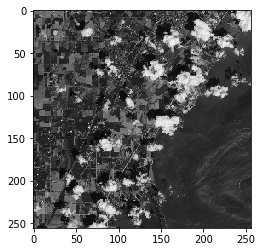

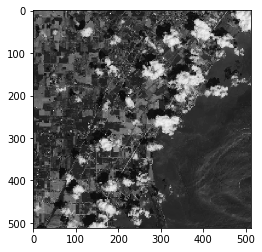

In [7]:
imagen_ampliada=amplia(img_25)
plt.figure(1)
plt.imshow(img_25,cmap='gray')
plt.figure(2)
plt.imshow(imagen_ampliada,cmap='gray')
cv2.imwrite("modificadas/7_Lake Erie_Ampliado.png",imagen_ampliada)